In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(y_train)

print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


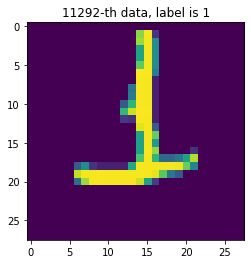

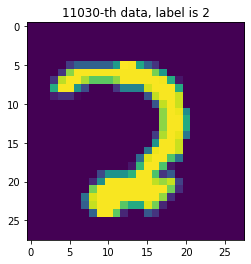

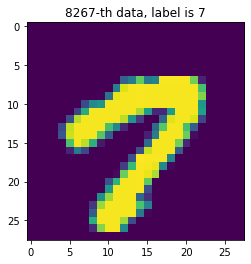

In [4]:
sample_size = 3
random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' % (idx,label))

In [ ]:
# 검증 데이터 만들기

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

print(f'훈련데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련데이터 (42000, 28, 28) 레이블 (42000,)
검증데이터 (18000, 28, 28) 레이블 (18000,)


In [ ]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

#모델 입력사용하기 위한 전처리과정
x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28))) / 255

print(x_train.shape)

(42000, 784)


**<그래디언트 손실 vs 그래디언트 폭발>**


경사 하강법을 사용할 때 딥러닝은 출력층에서 입력층으로 오차 그래디언트를 전파시키는 역전파 알고리즘을 사용한다. 하지만 이 알고리즘은 하위층으로 갈수록 그래디언트가 작아지게 되어 하위층의 연결 가중치가 변경이 되지 않는 현상이 발생한다. 이를 그래디언트 손실이라고 한다.



In [ ]:
# 모델의 마지막 층에서 softmax함수를 사용하기 때문에 각 데이터의 레이블을 범주형 형태로 변경

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**모델 구성하기**

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# softmax와 sigmoid 값의 비교

def softmax(arr):
  m = np.max(arr)
  arr = arr - m
  arr = np.exp(arr)
  return arr / np.sum(arr)

def sigmoid(x):
  return 1 / (1+np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [ ]:
# 학습과정 설정하기

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 6ms/step - loss: 1.8608 - accuracy: 0.4607 - val_loss: 1.2102 - val_accuracy: 0.6533
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.9114 - accuracy: 0.7374 - val_loss: 0.7206 - val_accuracy: 0.7879
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6319 - accuracy: 0.8129 - val_loss: 0.5686 - val_accuracy: 0.8324
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.5378 - accuracy: 0.8398 - val_loss: 0.5100 - val_accuracy: 0.8539
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4856 - accuracy: 0.8589 - val_loss: 0.4634 - val_accuracy: 0.8681
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4476 - accuracy: 0.8723 - val_loss: 0.4307 - val_accuracy: 0.8798
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4165 - accuracy: 0.8825 - val_loss: 0.4068 - val_accuracy: 0.8859
Epoch 

In [ ]:
# 손실값과 평가지표의 값을 dictionary형태로 저장
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

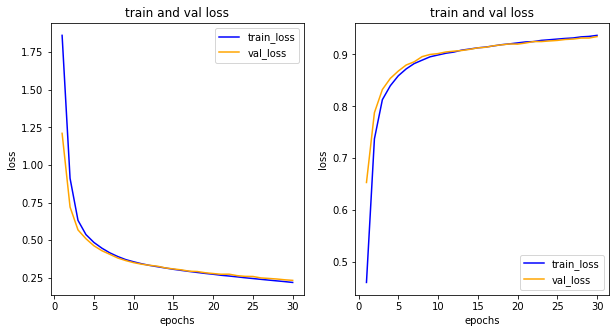

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color ='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

#학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color='orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [ ]:
# 모델 평가하기
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2261 - accuracy: 0.9340

테스트 정확도: 0.9340000152587891


In [ ]:
# 학습된 모델통해 값 예측하기

y_predict = model.predict(x_test)
print(y_predict.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 : \n{y_predict [0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[1.3161069e-04 2.6949390e-08 7.7147386e-04 3.7656229e-03 2.2406837e-07
 5.1601656e-04 2.3910391e-11 9.9351799e-01 1.0421071e-05 1.2865792e-03]


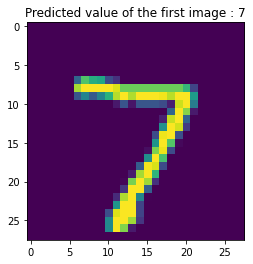

In [ ]:
arg_results = np.argmax(y_predict, axis=-1)    #가장 큰 값의 인덱스 반환
plt.imshow(x_test[0].reshape(28,28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()

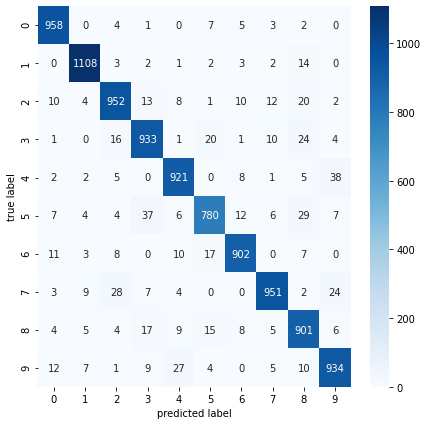

In [ ]:
# 모델 평가 방법1 - 혼동행렬(confusion matrix)

plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(y_predict, axis = -1))
sns.heatmap(cm, annot=True, fmt ='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
print('\n', classification_report(np.argmax(y_test, axis=-1), np.argmax(y_predict, axis=-1)))


               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.92      0.93      1032
           3       0.92      0.92      0.92      1010
           4       0.93      0.94      0.94       982
           5       0.92      0.87      0.90       892
           6       0.95      0.94      0.95       958
           7       0.96      0.93      0.94      1028
           8       0.89      0.93      0.91       974
           9       0.92      0.93      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

